In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.float_format = lambda x: f"{x:0,.2f}"
plt.rcParams["figure.figsize"] = (14, 7)
plt.rcParams["font.size"] = 15

# Credit Default Analysis

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_1**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

In [628]:
credit = pd.read_csv("./UCI_Credit_Card.csv", index_col=0)
credit.rename(columns={"default.payment.next.month": "default",
                       "PAY_0": "PAY_1"}, inplace=True)

In [629]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,"30,000.00","167,484.32","129,747.66","10,000.00","50,000.00","140,000.00","240,000.00","1,000,000.00"
SEX,"30,000.00",1.60,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,"30,000.00",1.85,0.79,0.00,1.00,2.00,2.00,6.00
MARRIAGE,"30,000.00",1.55,0.52,0.00,1.00,2.00,2.00,3.00
AGE,"30,000.00",35.49,9.22,21.00,28.00,34.00,41.00,79.00
PAY_1,"30,000.00",-0.02,1.12,-2.00,-1.00,0.00,0.00,8.00
PAY_2,"30,000.00",-0.13,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_3,"30,000.00",-0.17,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_4,"30,000.00",-0.22,1.17,-2.00,-1.00,0.00,0.00,8.00
PAY_5,"30,000.00",-0.27,1.13,-2.00,-1.00,0.00,0.00,8.00


**Initial Observations:**  
* 60% of observations come from women; 40% men.
* 53% of all credit card holders are married
* 47% attended a university, 35% graduate schools, 16% high school
* 22% of the sampled observations defaulted in their loan

We now proceed to look at the payments made through each month

In [630]:
months = ["April", "May", "June", "July", "August", "September"]
payments = pd.DataFrame([credit[f"PAY_{v}"].value_counts() for v in range(6, 0, -1)])
payments.index = months
payments

,-2,-1,0,1,2,3,4,5,6,7,8
April,"4,895.00","5,740.00","16,286.00",nan,"2,766.00",184.00,49.00,13.00,19.00,46.00,2.00
May,"4,546.00","5,539.00","16,947.00",nan,"2,626.00",178.00,84.00,17.00,4.00,58.00,1.00
June,"4,348.00","5,687.00","16,455.00",2.00,"3,159.00",180.00,69.00,35.00,5.00,58.00,2.00
July,"4,085.00","5,938.00","15,764.00",4.00,"3,819.00",240.00,76.00,21.00,23.00,27.00,3.00
August,"3,782.00","6,050.00","15,730.00",28.00,"3,927.00",326.00,99.00,25.00,12.00,20.00,1.00
September,"2,759.00","5,686.00","14,737.00","3,688.00","2,667.00",322.00,76.00,26.00,11.00,9.00,19.00


In oder to understand the payment and bill amount of people through the months, we normalize each month considering the mean and the standard deviation for the payment and bill amount throughout the months.

In order to understand the payment of people throughout the months, we consider their **relative behaviour**.
For instance, April was month in which both sample population had less money in the bank and the less amount off their credit balance way payed. On the other hand, in september, people had more money in their bank account and payed relatively much more than what was payed in April, albeit less than what was payed in august.

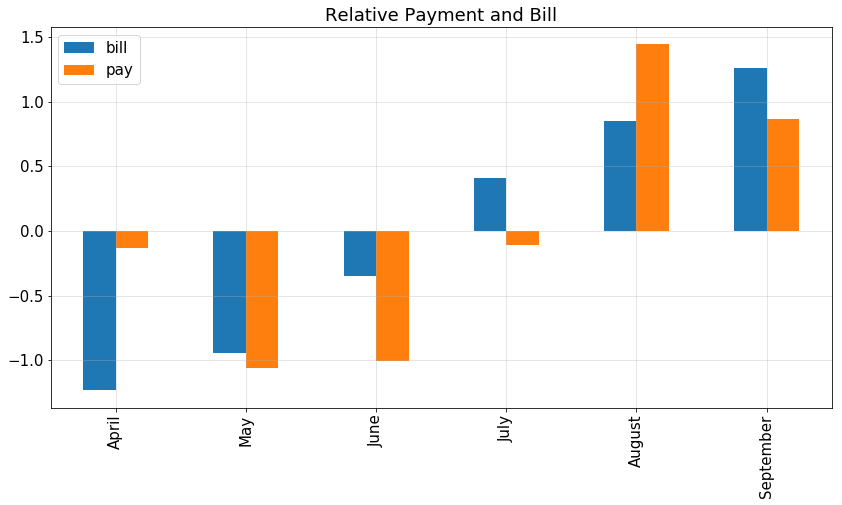

In [631]:
def make_amt(base):
    amt = credit[[f"{base}{v}" for v in range(6, 0, -1)]].mean(axis=0)
    amt.index = months
    return amt

credit_bill = make_amt("BILL_AMT")
pay_bill = make_amt("PAY_AMT")
credit_bill = (credit_bill - credit_bill.mean())/ credit_bill.std()
pay_bill = (pay_bill - pay_bill.mean())/ pay_bill.std()
pd.concat(dict(bill=credit_bill, pay=pay_bill), axis=1).plot(kind="bar", title="Relative Payment and Bill")
plt.grid(alpha=0.4)

Among clients, agrregated by their level of education, we note that classes 2 and 3, corresponding to high school and college students, are the only group who, on average, are delayed in their payments for the months of August and September.

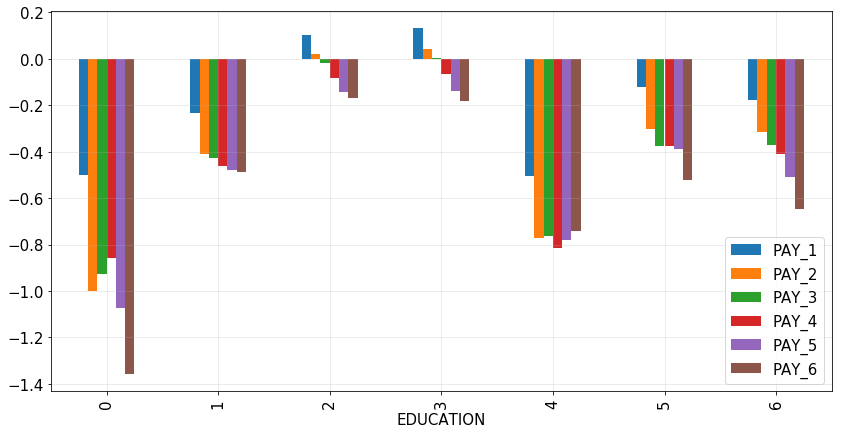

In [632]:
payments_cols = [f"PAY_{v}" for v in range(6, 0, -1)]
credit.pivot_table(index="EDUCATION", values=payments_cols, aggfunc="mean").plot(kind="bar")
plt.grid(alpha=0.3);

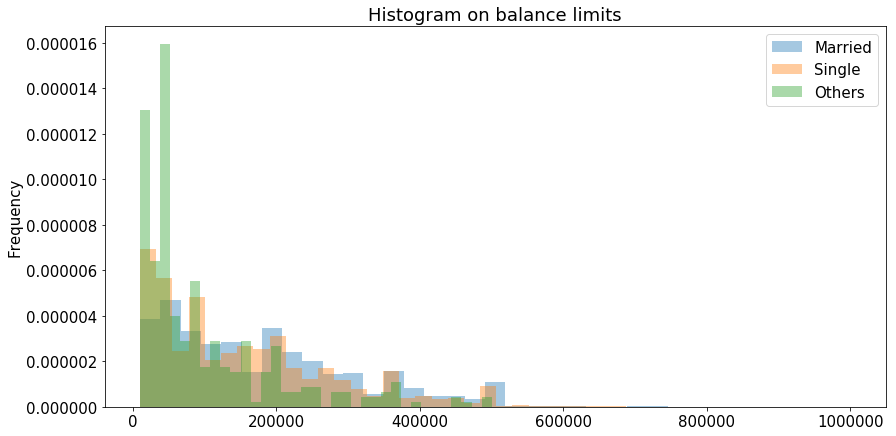

In [638]:
(credit.query("MARRIAGE != 0")
       .groupby("MARRIAGE")
       .LIMIT_BAL
       .plot(kind="hist", alpha=0.4, bins=35, density=True))

plt.legend(["Married", "Single", "Others"])
plt.title("Histogram on balance limits");

### Variable transformation
We create one hot encoders for the columns `SEX`, `EDUCATION`, `MARRIAGE`; furthrermore, we split our `credit` dataset in 20% test, 80% train.

In [639]:
credit = pd.get_dummies(credit, columns=["SEX", "EDUCATION", "MARRIAGE"])
credit_train, credit_test = train_test_split(credit, test_size=0.2, random_state=1643)
credit_train.shape

(24000, 34)

In [640]:
credit_train.pivot_table(index="default", values=[f"MARRIAGE_{v}" for v in range(1, 4)])

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
default,,,
0,0.45,0.54,0.01
1,0.48,0.51,0.01


In [641]:
    credit_train.pivot_table(index="default", values=[f"EDUCATION_{v}" for v in range(1, 5)])

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
default,,,,
0,0.37,0.46,0.16,0.01
1,0.31,0.51,0.18,0.00


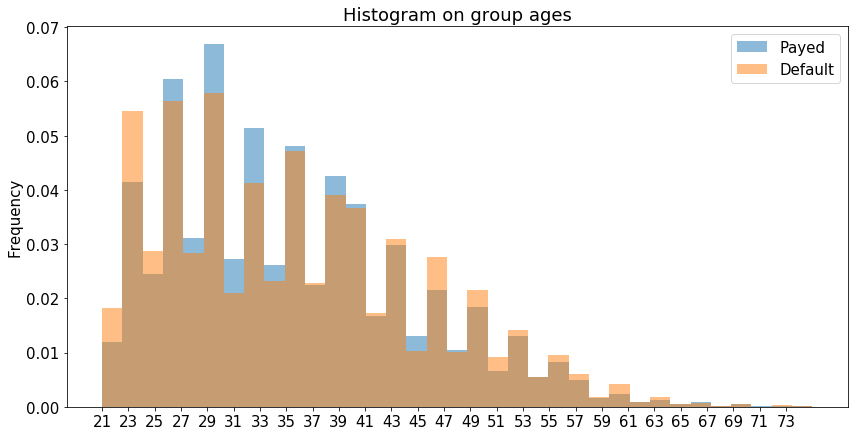

In [646]:
credit_train.groupby("default").AGE.plot(kind="hist", bins=35, alpha=0.5, density=True)
plt.legend(["Payed", "Default"])
plt.xticks(np.arange(credit_train.AGE.min(), credit_train.AGE.max(), 2))
plt.title("Histogram on group ages");

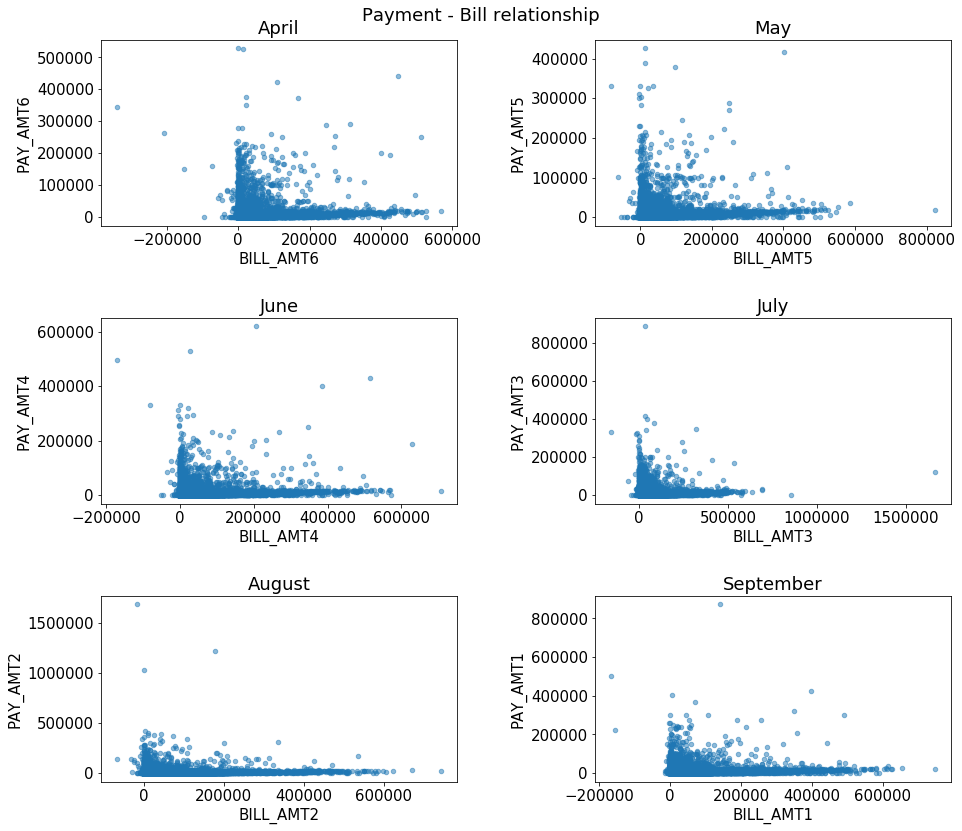

In [704]:
months_dict = {(6 - i):v for i, v in enumerate(months)}
fig = plt.figure(figsize=(14, 12))
for i in range(1, 7):
    ax = fig.add_subplot(3,2, (7 - i))
    credit_train.plot(x=f"BILL_AMT{i}", y=f"PAY_AMT{i}",
                      kind="scatter",
                      alpha=0.5, ax=ax)
    ax.set_title(months_dict[i])
plt.tight_layout(2)
plt.suptitle("Payment - Bill relationship");

## Training a Model: Logistic Regression

As a first approach, we will consider a simple linear model: the logistic regression.

Before preforming any training, we will first normalize the data

In [710]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [705]:
norm = Normalizer()
X_train = credit_train.drop("default", axis=1).values
X_train = norm.fit_transform(X_train)
y_train = credit_train["default"].values

In [711]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
format(lreg.score(X_train, y_train), "0.2%")

'77.83%'

The logistic regression seems to preform fairly well given the complexity of the dataset. To anlize this further let us compute the precision and recall.

Where
$$\text{Precision} = \frac{TP}{TP + FP}$$

$$\text{Recall} = \frac{TP}{TP + FN}$$

In [723]:
lreg_yhat = lreg.predict(X_train)
lreg_prec = precision_score(y_train, lreg_yhat)
lreg_rec = recall_score(y_train, lreg_yhat)

print(f"Logistic Regression Precision: {lreg_prec:0.5%}")
print(f"Logistic Regression Recall: {lreg_rec: 0.5%}")

Logistic Regression Precision: 20.00000%
Logistic Regression Recall:  0.01880%


What happened?  
Precision considers all values that the model classified as positives. For our training dataset, that our precision is only 20% implies that out of those who we said were going to default, only 20% did so.

On the other hand, recall considers all values that are truly positive. That our recall is close to 0% means that, consdiering all those who truly defaulted on their payment, we got almost no one!

This might seem paradoxicall, if we have an accuracy of 70%, how come both our precision and recall are so low? To answer this question it becomes practical to look at the confussion matrix of the model

In [724]:
confusion_matrix(y_train, lreg_yhat)

array([[18678,     4],
       [ 5317,     1]])

The entry $(i, j)$ in the matrix above shows the predicted class $j$ v.s. the real class $i$. For example, the entry $(0,0)$ shows the class predicted as $0$ (no default) that is really $0$, i.e., all those who did not default; similarly, the entry $(0, 1)$ shows the predicted class $1$ v.s. the real class $0$.

In other words, our model decided to classify only 5 observations as 1 (default), and could guess only one!

Another key element to point in our dataset is the unbalance between positive and negative classes.

In [729]:
credit_train.default.mean()

0.22158333333333333

In our training set, only 20% of the observations come from people who defaulted on their credit card

Whenever simple models such as linear regression are to *biased* for our model, we may rely in more complex models such as a random forest.

#### The random forest case

In [726]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest.score(X_train, y_train)

0.97924999999999995

To start off, we note that the accuracy drasticallly increased. But, as it is the case with the logistic regression model, we care, in this case, about the recall

In [730]:
rforest_yhat = rforest.predict(X_train)
recall_score(y_train, rforest_yhat)

0.91199699135013168

91%! Much better than 0%. This means that, using a random forest classfier, we can expect to caught 91% of all the people likely to default on their credit card.

### Final Remarks

To asses the final value of the model, let us compute the precision, recall and confussion matrix for our (unseen) test dataset

In [738]:
yhat_test = rforest.predict(X_test)
test_presision = precision_score(y_test, yhat_test)
test_recall = recall_score(y_test, yhat_test)

print(f"Model Precision: {test_presision}")
print(f"Model Recall: {test_recall}")

Model Precision: 0.6008902077151336
Model Recall: 0.30728376327769347


In [739]:
confusion_matrix(y_test, yhat_test)

array([[4413,  269],
       [ 913,  405]])